In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.model_selection import train_test_split
import os

# EDA

In [ ]:
data_training = pd.read_csv('../../data/data.csv', names=['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'])
data_validation = pd.read_csv('../../data/data.csv', names=['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'])
data_training.head()

,center,left,right,steering,throttle,brake,speed
0,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.661163
1,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.631739
2,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.595292
3,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.566399
4,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ce...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/le...,/mnt/HDD/Programs/Python/SelfDrivingCar/IMG/ri...,0.0,0.0,0,3.530607


In [51]:
images_center = data_training['center']
images_center = [cv.imread(img_path) for img_path in images_center]
images_center = [cv.cvtColor(img, cv.COLOR_BGR2RGB) for img in images_center]

In [52]:
images_center[0].shape

(160, 320, 3)

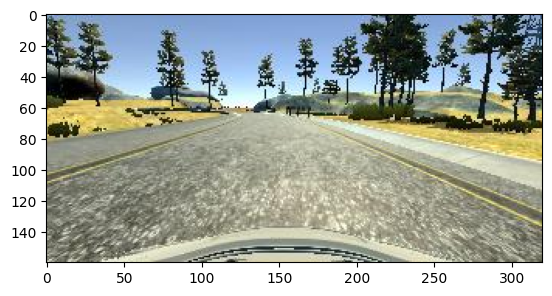

In [53]:
plt.imshow(images_center[0])

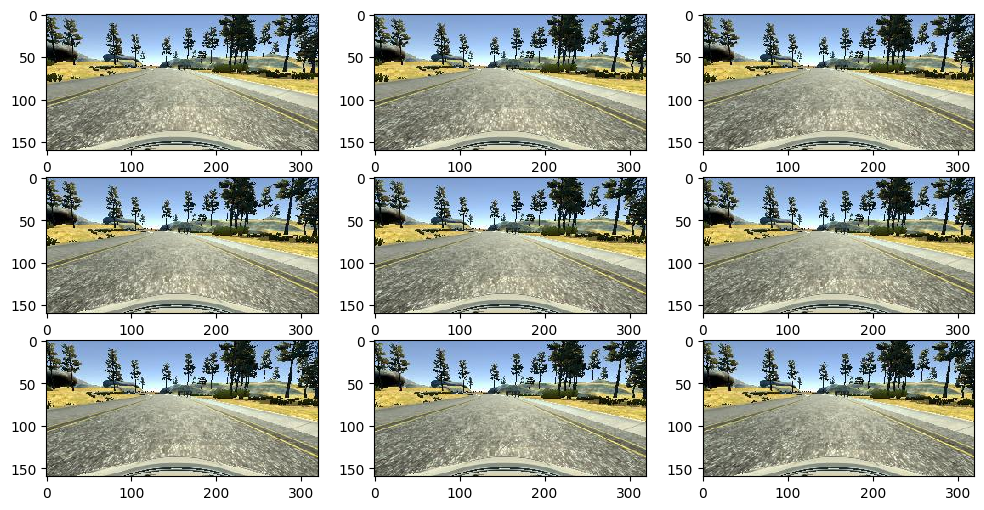

In [54]:
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(images_center[i], interpolation='nearest')
plt.show()

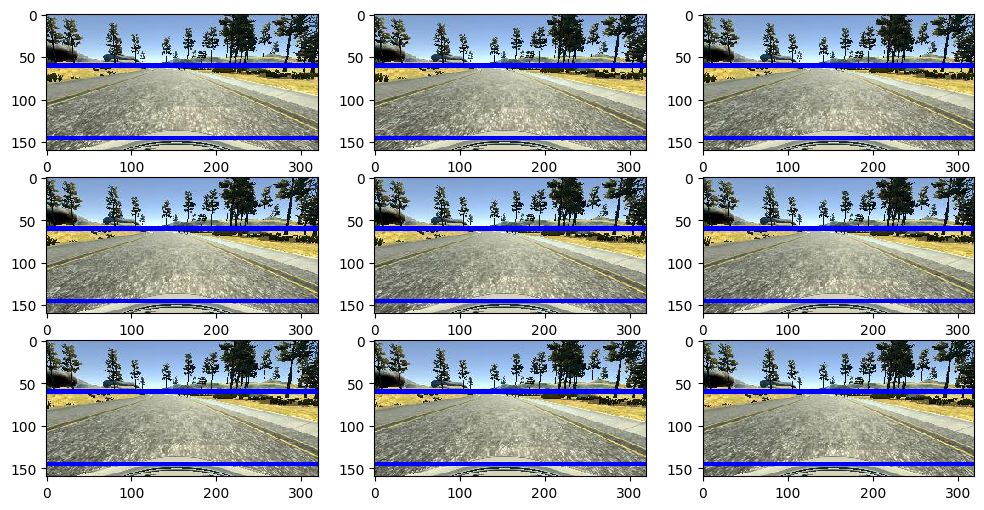

In [55]:
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    img = images_center[i]
    img = cv.line(img, (0, 60), (320, 60), (0, 0, 255), 4)
    img = cv.line(img, (0, 145), (320, 145), (0, 0, 255), 4)
    plt.imshow(img, interpolation='nearest')
plt.show()

In [56]:
images_center_cropped = [img[60:145, 0:320] for img in images_center]

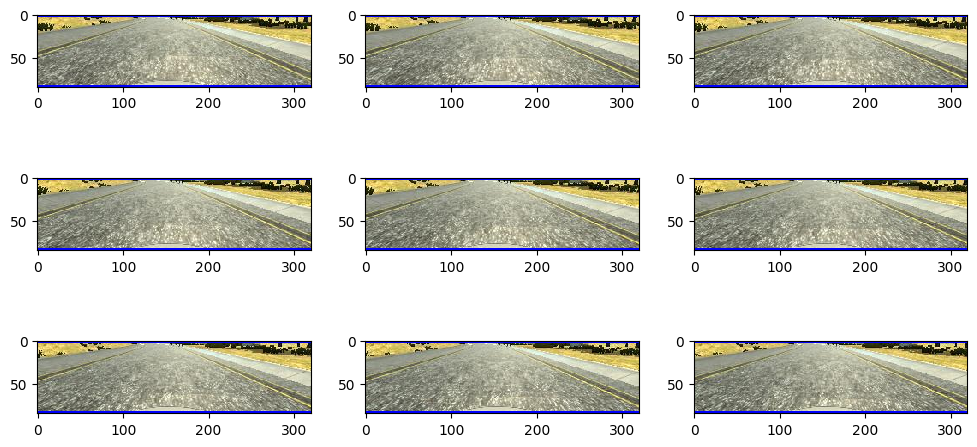

In [57]:

# visualize cropped images
w = 320
h = 160

fig = plt.figure(figsize=(12, 6))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(images_center_cropped[i], interpolation='nearest')
plt.show()

In [58]:
# cropped video
video = cv.VideoWriter('../../data/video.avi', cv.VideoWriter_fourcc(*'DIVX'), 20, (320, 100))
for img in images_center_cropped:
    video.write(img)

In [59]:
X = data_training[['center', 'left', 'right']].values
y = data_training['steering']

In [68]:
images_training = []
steering_values_training = []
for i in range(len(X)):
    center, left, right = X[i]
    images_training.append(cv.imread(center))
    images_training.append(cv.imread(left))
    images_training.append(cv.imread(right))
    steering_values_training.append(y[i])
    steering_values_training.append(y[i] + 0.2)
    steering_values_training.append(y[i] - 0.2)


In [69]:
for i in range(len(images_training)):
    images_training[i] = cv.cvtColor(images_training[i], cv.COLOR_BGR2RGB)
    images_training[i] = images_training[i][60:145, 0:320]

In [70]:
images_training = np.array(images_training)
steering_values_training = np.array(steering_values_training)
print("Images shape: ", images_training.shape)
print("Steering values shape: ", steering_values_training.shape)

Images shape:  (9528, 85, 320, 3)
Steering values shape:  (9528,)


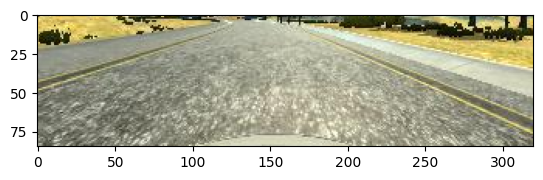

In [71]:
plt.imshow(images_training[0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [73]:
def ModelNvidia():
    model = Sequential()
    model.add(Conv2D(24, (5, 5), strides=(2,2), input_shape=(85, 320, 3), activation='elu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [74]:
model = ModelNvidia()
model.summary()

/mnt/HDD/Programs/Python/SelfDrivingCar/project-2/carenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 41, 158, 24)    │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 19, 77, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 37, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 35, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 33, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 33, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8448)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │       844,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 981,819 (3.75 MB)

 Trainable params: 981,819 (3.75 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = model.fit(images_training, steering_values_training, batch_size=32, epochs=30, validation_split=0.2, verbose=1, shuffle=1)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1306 - val_loss: 0.0355
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1099 - val_loss: 0.0357
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1310 - val_loss: 0.0352
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1036 - val_loss: 0.0356
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1080 - val_loss: 0.0351
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1097 - val_loss: 0.0351
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1039 - val_loss: 0.0352
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1048 - val_loss: 0.0361
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0992 - val_loss: 0.0353
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1021 - val_loss: 0.0364
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1000 - val_loss: 0.0368
Epoch 12/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 0, 'Epoch')

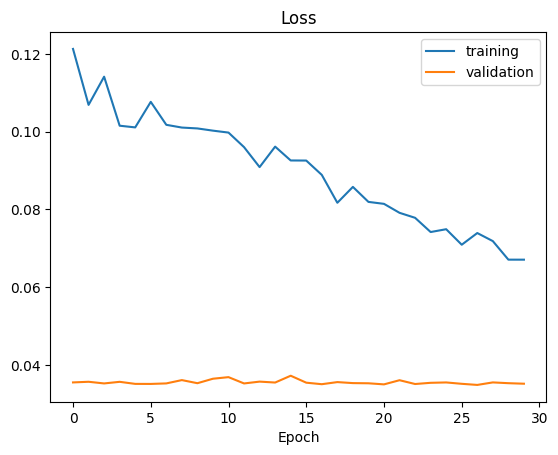

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [79]:
model.save('model1.h5')